In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Cargar las bases de datos en formato CSV
train = pd.read_csv(
    "trainData.csv"
)  # Base de datos de entrenamiento con 1 millón de vuelos y 21 variables
test = pd.read_csv(
    "evalData.csv"
)  # Base de datos de prueba con 248 mil vuelos y 20 variables (sin la variable no show)


In [4]:

# Explorar las bases de datos
train.head()  # Ver las primeras filas de la base de datos de entrenamiento
train.info()  # Ver los tipos de datos y el número de valores no nulos de cada variable
train.describe()  # Ver las estadísticas descriptivas de cada variable numérica
train[
    "noshow"
].value_counts()  # Ver la distribución de la variable dependiente (no show)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999890 entries, 0 to 999889
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       999890 non-null  int64  
 1   date             999890 non-null  object 
 2   fligth_number    999890 non-null  int64  
 3   origin           999890 non-null  object 
 4   destination      999890 non-null  object 
 5   distance         999890 non-null  int64  
 6   noshow           999890 non-null  float64
 7   denied_boarding  999890 non-null  int64  
 8   pax_midlow       999890 non-null  int64  
 9   pax_high         999890 non-null  int64  
 10  pax_midhigh      999890 non-null  int64  
 11  pax_low          999890 non-null  int64  
 12  pax_freqflyer    999890 non-null  int64  
 13  group_bookings   999890 non-null  int64  
 14  out_of_stock     999890 non-null  int64  
 15  dom_cnx          999890 non-null  int64  
 16  int_cnx          999890 non-null  int6

noshow
4.0      103391
3.0      102522
5.0       97091
2.0       95235
6.0       86540
          ...  
93.0          1
124.0         1
105.0         1
99.0          1
108.0         1
Name: count, Length: 115, dtype: int64

ValueError: could not convert string to float: '2009-11-09'

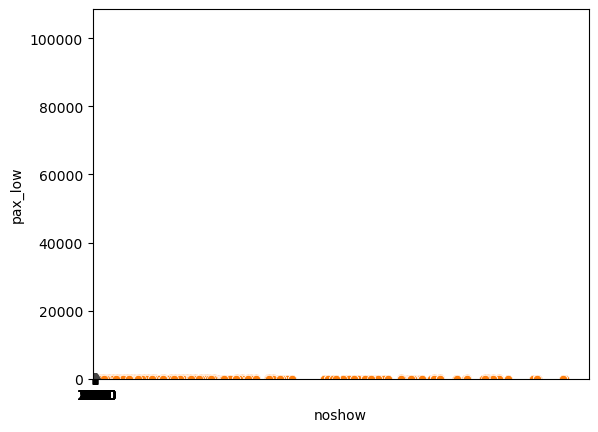

In [11]:
# Visualizar las relaciones entre las variables
sns.histplot(train["noshow"])  # Ver el histograma de la variable dependiente (no show)
sns.boxplot(
    x="noshow", y="pax_low", data=train
)  # Ver el diagrama de caja de la variable dependiente (no show) según la variable independiente (price)
sns.scatterplot(
    x="distance", y="noshow", data=train
)  # Ver el diagrama de dispersión entre la variable dependiente (no show) y la variable independiente (distance)
sns.heatmap(
    train.corr(), annot=True
)  # Ver la matriz de correlación entre todas las variables numéricas


In [ ]:

# Seleccionar las variables predictoras
X_train = train[
    ["price", "distance", "origin", "destination"]
]  # Seleccionar las variables independientes que se consideran relevantes para el problema
y_train = train["no_show"]  # Seleccionar la variable dependiente (no show)
X_test = test[
    ["price", "distance", "origin", "destination"]
]  # Seleccionar las mismas variables independientes para la base de datos de prueba


In [ ]:
# Dividir la base de datos de entrenamiento en dos conjuntos: uno para entrenar el modelo y otro para validar su rendimiento
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)  # Hacer una división aleatoria y estratificada con un 80% para entrenamiento y un 20% para validación


In [ ]:
# Elegir el tipo de regresión que se va a usar para el problema
model = LinearRegression()  # Elegir una regresión lineal como modelo inicial

# Ajustar el modelo de regresión usando el conjunto de entrenamiento
model.fit(
    X_train, y_train
)  # Pasar como argumentos los conjuntos de entrenamiento de las variables independientes y dependientes

# Evaluar el modelo de regresión usando el conjunto de validación
y_pred = model.predict(
    X_val
)  # Pasar como argumento el conjunto de validación de las variables independientes y obtener los valores predichos de la variable dependiente
mse = mean_squared_error(
    y_val, y_pred
)  # Calcular el error cuadrático medio entre los valores reales y los predichos
mae = mean_absolute_error(
    y_val, y_pred
)  # Calcular el error absoluto medio entre los valores reales y los predichos
r2 = r2_score(
    y_val, y_pred
)  # Calcular el coeficiente de determinación entre los valores reales y los predichos
print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")  # Imprimir los resultados de las métricas
plt.scatter(
    y_val, y_pred
)  # Ver el diagrama de dispersión entre los valores reales y los predichos


In [ ]:
# Optimizar el modelo de regresión si se considera necesario
model = Ridge()  # Elegir una regresión Ridge como modelo alternativo con regularización
params = {
    "alpha": [0.01, 0.1, 1, 10]
}  # Definir un diccionario con los posibles valores del parámetro alpha (coeficiente de regularización)
grid = GridSearchCV(
    model, params, scoring="neg_mean_squared_error"
)  # Definir un objeto GridSearchCV para hacer una búsqueda exhaustiva de los mejores parámetros según el error cuadrático medio negativo
grid.fit(
    X_train, y_train
)  # Ajustar el objeto GridSearchCV usando el conjunto de entrenamiento
print(grid.best_params_)  # Imprimir los mejores parámetros encontrados
model = grid.best_estimator_  # Asignar el mejor modelo encontrado al objeto model
y_pred = model.predict(
    X_val
)  # Evaluar el modelo optimizado usando el conjunto de validación
mse = mean_squared_error(
    y_val, y_pred
)  # Calcular el error cuadrático medio entre los valores reales y los predichos
mae = mean_absolute_error(
    y_val, y_pred
)  # Calcular el error absoluto medio entre los valores reales y los predichos
r2 = r2_score(
    y_val, y_pred
)  # Calcular el coeficiente de determinación entre los valores reales y los predichos
print(f"MSE: {mse}, MAE: {mae}, R2: {r2}")  # Imprimir los resultados de las métricas
plt.scatter(
    y_val, y_pred
)  # Ver el diagrama de dispersión entre los valores reales y los predichos


In [ ]:

# Aplicar el modelo de regresión a la base de datos de prueba que no tiene la variable no show
y_test = model.predict(
    X_test
)  # Pasar como argumento la base de datos de prueba con las variables independientes y obtener los valores predichos de no show para cada vuelo

# Generar un archivo CSV con una sola columna y 248 mil filas con los valores predichos de no show
y_test = pd.DataFrame(
    y_test, columns=["no_show"]
)  # Crear un objeto DataFrame con los valores predichos y asignarle un nombre a la columna
y_test.to_csv(
    "no_show.csv", index=False
)  # Guardar el archivo CSV en el directorio deseado sin incluir el índice
